In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("/eos/uscms/store/user/jennetd/smart-pixels/parquet/shuffled/dataset_3sr_16x16_50x12P5_parquets/test_contained/part.80.parquet")

In [3]:
df.shape

(5438, 5136)

In [4]:
# Size of pixel array
len_xy = 16 * 16
# Select last time slice
t = 19
# Use these columns
col_indices = np.arange(t * len_xy, (t + 1) * len_xy).astype(str)

In [5]:
last_slice = (df[col_indices].values).reshape(len(df),16,16)
last_slice

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [6]:
yprofile = np.sum(last_slice,axis=2)
xprofile = np.sum(last_slice,axis=1)

In [7]:
ratio = (yprofile/yprofile)
ratio[np.isnan(ratio)] = 0
ratio

/tmp/ipykernel_255315/1016192322.py:1: RuntimeWarning: invalid value encountered in divide
  ratio = (yprofile/yprofile)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5438, 16))

(array([  0.,   0., 335., 641., 551., 544., 527., 561., 479., 459., 420.,
        332., 256., 160., 125.,  48.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16.]),
 <BarContainer object of 16 artists>)

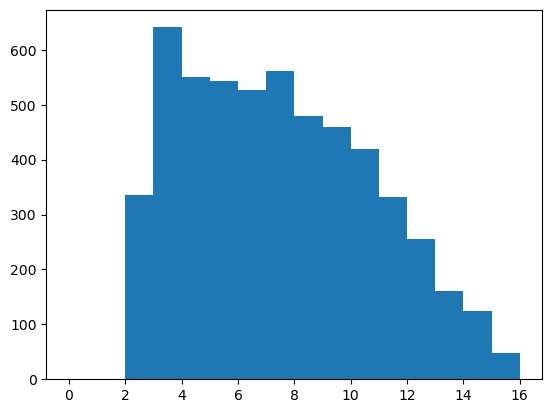

In [8]:
ysize = np.sum(ratio,axis=1)
plt.hist(ysize,bins=np.linspace(0,16,17))

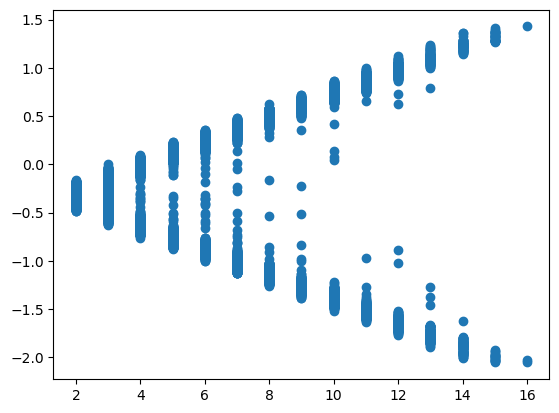

In [9]:
plt.scatter(ysize,df['cotBeta'])

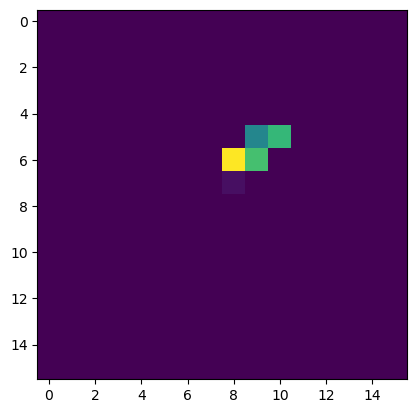

In [10]:


index = 10
plt.imshow(last_slice[index,:,:])